<a href="https://colab.research.google.com/github/salonibhatiadutta/yolo-implementation/blob/main/yolo_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2


In [72]:
net=cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [73]:
classes = []
with open("./coco.names",'r') as f:
  classes=f.read().splitlines()

In [74]:
classes,len(classes)

(['person',
  'bicycle',
  'car',
  'motorbike',
  'aeroplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic light',
  'fire hydrant',
  'stop sign',
  'parking meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports ball',
  'kite',
  'baseball bat',
  'baseball glove',
  'skateboard',
  'surfboard',
  'tennis racket',
  'bottle',
  'wine glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'sofa',
  'pottedplant',
  'bed',
  'diningtable',
  'toilet',
  'tvmonitor',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy bear',
  'hair

In [91]:
print(classes[16])

dog


In [75]:
COLORS = np.random.uniform(0, 255, size=(len(classes), 3)) # generate different colors for different classes 

In [141]:
img=cv2.imread("./dog.jpg")

In [142]:
width = img.shape[1]
height = img.shape[0]
scale = 0.00392

In [143]:
print(width,height)

768 576


In [182]:
blob=cv2.dnn.blobFromImage(img,scale,(416,416),(0,0,0),swapRB=True,crop=False) # converting BGR to RG 1/255 to normalize values, 416 is reshaping the image, swapRB to swap the RGB format

In [183]:
blob.shape

(1, 3, 416, 416)

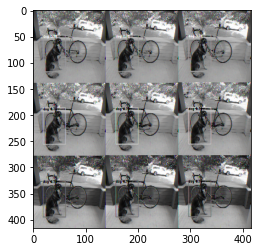

In [184]:
#to print the blob image
i=blob.reshape(416,416,3)
plt.imshow(i)

In [185]:
net.setInput(blob)

In [186]:
output_layer_name=net.getUnconnectedOutLayersNames()
layeroutput=net.forward(output_layer_name)

In [187]:
#creating bounding boxes
boxes= []                   #list for boxes detection
confidences= []              # list for the probability of detetction
class_ids= []               #list of the classes detected

for output in layeroutput:        # evaluating through the output layer
   for detection in output:        #detecting the bounding boxes in output layer
     score=detection[5:]           #y=[bx,by,bw,bh,classes(80)] we require bounding box values score=bx,by,bw,bh thus using the 4 values from array
     class_id=np.argmax(score)     #putting the max score values in class_id
     confidence=score[class_id]    #putting the probability (80 classes)
    # to avoid multiple detetctions using Non-Max suppression algo
     if confidence > 0.7:
      #extracting features
       center_x=int(detection[0]*width)
       center_y=int(detection[1]*height)
       w=int(detection[2]*width) 
       h=int(detection[3]*height) 
      #finding the corners of the bounding box
       x=int(center_x-w/2)
       y=int(center_y-h/2)
       print([x,y,w,h])
      #appending in the box list
       boxes.append([x,y,w,h])
       confidences.append(float(confidence))
       class_ids.append(class_id)

[466, 82, 220, 89]


In [188]:
len(boxes)

1

**Non-max Suppression to avoid multiple detection**

In [189]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)  #0.5 for confidence threshold and 0.4 for NMS threshold

In [190]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [191]:
from matplotlib import image
for i in indexes.flatten():
  x,y,w,h=boxes[i]

  label=str(classes[class_ids[i]])
  confi=str(round(confidences[i],2))
  color=colors[i]

  cv2.rectangle(img, (x,y),(x+w,y+h), color,5)
  cv2.putText(img, label+" "+confi, (x,y+20), font,2,(0,0,255),4)


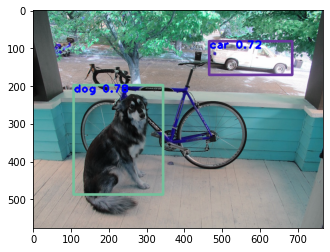

In [192]:
plt.imshow(img)